In [19]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import func_stat

In [31]:
### Create resid column ###
def residCol(df,colSpectrZ, colPhotoZ,colResid):
    df[colResid]=(df[colSpectrZ]-df[colPhotoZ])/(df[colSpectrZ]+1)
    return df

In [100]:
dirCat=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\catalogs\forPaper\v05'
dirConfigs=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\configsArticle\Vis_UV_IR'
dirExp=r'D:\Sources\COSMOS_photoZ\COSMOS_v3.0\experimentsArticle\Vis_UV_IR'
expNum=1
fileNameCat=r'05_COSMOS_SpectrZ_Zlim_1p2_AllBands_colors.csv'
idcolumn='Seq'
zspeccolumn='z_spec'
cat=pd.read_csv(os.path.join(dirCat,fileNameCat))

In [101]:
stats={}
datasets={}

In [102]:
df=None
for dExp in os.listdir(dirExp):
    print(dExp)
    try:
        fname=next(f for f in os.listdir(os.path.join(dirExp,dExp)) if f.startswith('METAPHOR_testout'))
        df=pd.read_csv(os.path.join(dirExp,dExp,fname))
        df=residCol(df,colSpectrZ=zspeccolumn, colPhotoZ='zphoto',colResid='resid')
        datasets[dExp]=df
        stats[dExp]=func_stat.statByBins(df,binCol=zspeccolumn,residCols=['resid'])
    except:
        pass

exp001
exp003
exp004
exp005
exp006
exp007
exp008
exp009
exp010
exp011
exp012
exp013
exp014
exp015
exp016
exp017
exp018


In [103]:
def plotBinnedStats(stats,estimators,residCols,binCol,labels=None):
    colorBlindPalette=['#000000','#E69F00','#009E73','#0072B2','#D55E00','#56B4E9','#F0E442','#CC79A7']
    fig, axs = plt.subplots(len(estimators), 1,figsize=(7,3*len(estimators)),sharey='row',sharex='col')
    if len(estimators)==1:
        axs=[axs]
        
    for i,est in enumerate(estimators):
        for j, c in enumerate(residCols):
            ax=axs[i]
            ax.grid(axis='y',linestyle ='--')
            ax.grid(axis='x',linestyle ='--')
            ax.set_ylabel(est+' resid_'+c,size=12)
            for k,(key,val) in enumerate(stats.items()):
                #m=len(colorBlindPalette)%(k+1)-1
                if labels==None:
                    label=key
                else:
                    label=labels[k]
                ax.plot(val['General']['binEdge'],val[c][est],
                               label=label,marker='o',markersize=10-2*k,c=colorBlindPalette[k])
            ax.legend()
    axs[i].set_xlabel(binCol,size=12)
    plt.tight_layout()
    return fig

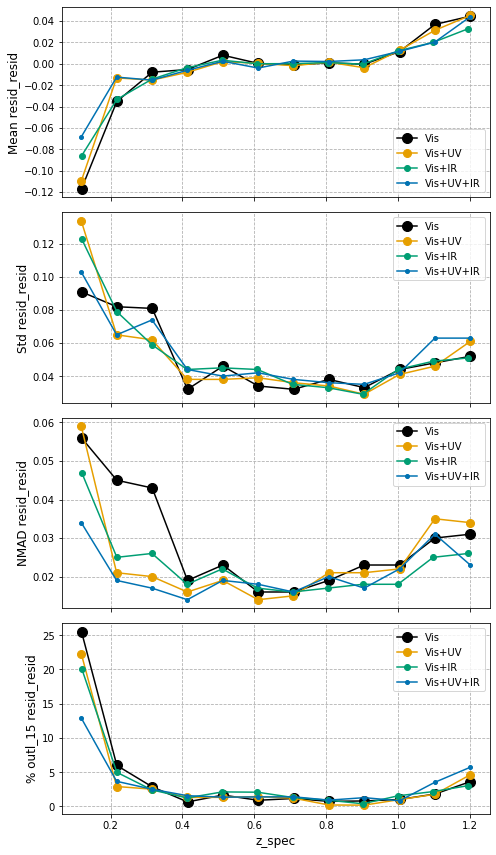

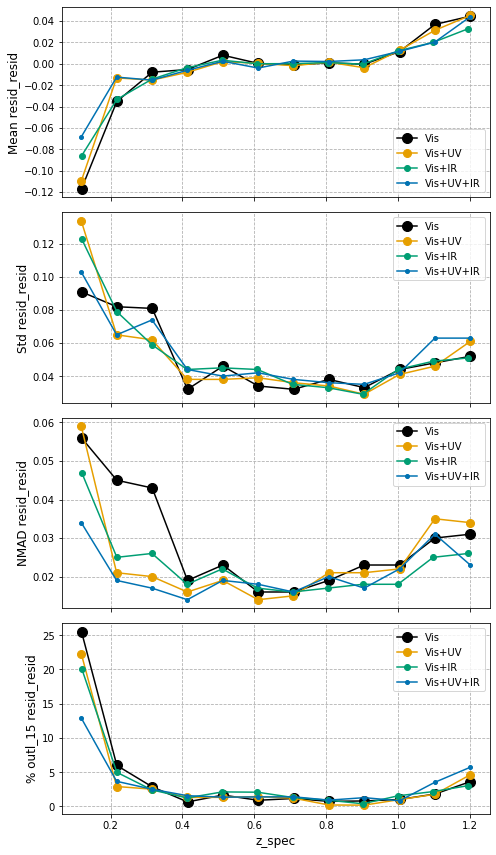

In [104]:
statsWork={key:val for key,val in stats.items() if key in('exp001','exp004','exp005','exp006')}
labels=['Vis','Vis+UV','Vis+IR','Vis+UV+IR']
plotBinnedStats(statsWork,estimators=['Mean','Std','NMAD','% outl_15'],residCols=['resid'],binCol=zspeccolumn,labels=labels)

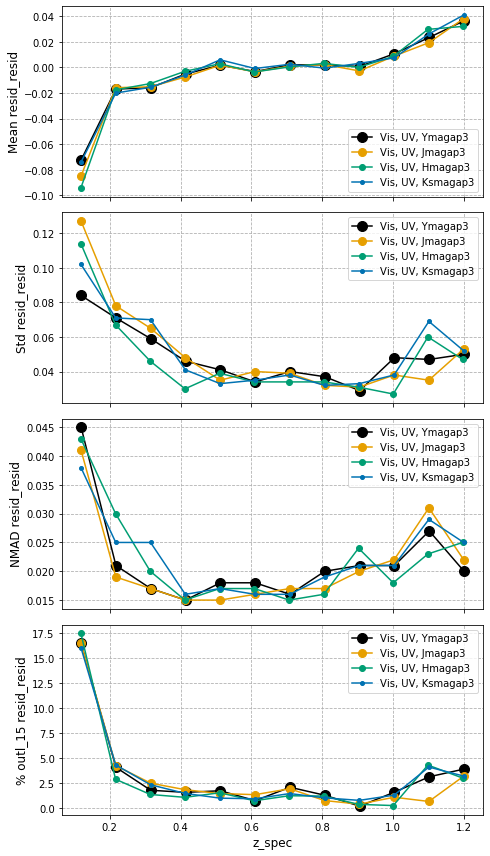

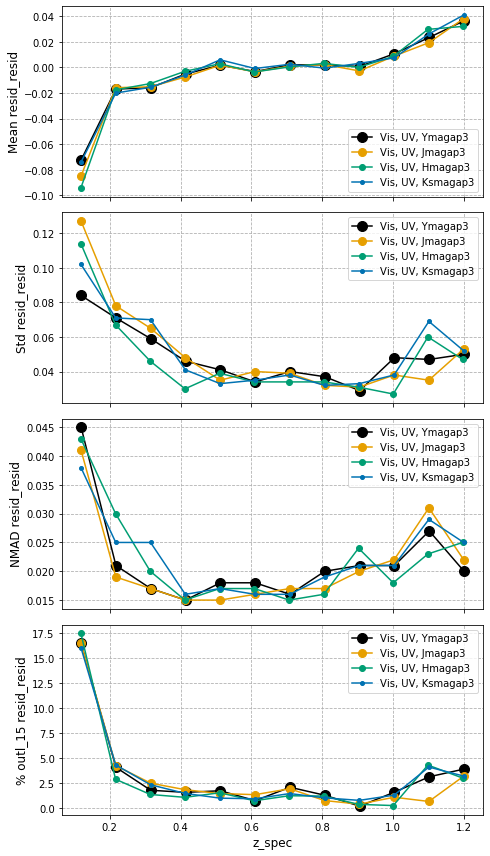

In [105]:
statsWork={key:val for key,val in stats.items() if key in('exp007','exp008','exp009','exp010')}
labels=['Vis, UV, Ymagap3','Vis, UV, Jmagap3','Vis, UV, Hmagap3','Vis, UV, Ksmagap3']
plotBinnedStats(statsWork,estimators=['Mean','Std','NMAD','% outl_15'],residCols=['resid'],binCol=zspeccolumn,labels=labels)